---

# CSCI 3352, Spring 2022
# FINAL PROJECT

<br> 

### Owen Smith, Kyle Ma

<br> 

In [60]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import math
import matplotlib
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeRegressor
import csv

In [61]:
### ITERATE THROUGH NETWORKS DIRECTORY, HANDLE FILES ###
directory = 'networks'
for filename in os.scandir(directory):
    filename = filename.name
    name, ext = os.path.splitext(filename)
    ext = str(ext)[0:4]
    if ext == '.csv' and filename != 'references.csv':
        data = np.loadtxt(open(directory + '/' + filename, "rb"), delimiter=",", skiprows=1)
        edgelist = ''
        listfile = open(directory + '/' + filename[:-4] + '.txt', 'w')
        for row in range(0, len(data)):
            for col in range(0, len(data[row])):
                if data[row][col] != 0:
                    edgelist = edgelist + str(row) + ' ' + str(col) + '\n'
        d = listfile.write(edgelist)
        listfile.close()

In [68]:
# takes in a graph G and returns a list of network statistics
def gather_network_stats(G):
    def compute_MGD(G):
        path = list((dict(nx.all_pairs_shortest_path_length(G)).values())) #takes return and converts to list of dicts
        Z = 0
        l_sum = 0

        for node in path:
            tmp = list(node.values()) #convert node dict to list of values
            tmp.remove(0) #remove all instances of 0
            Z = Z + len(tmp) #calculate Z from size of list
            l_sum = l_sum + sum(tmp) #add all the path lengths to the total for the numerator later on

        MGD = l_sum / Z
        return MGD
    
    def percent_single_degree(G): #gets percentage of nodes with degree of one, as these edge suggest specialized predation
        degrees = dict(G.degree())
        degrees = list(degrees.values())
        single_degree_count = 0
        for k in degrees:
            if k == 1:
                single_degree_count += 1
        return single_degree_count / G.number_of_nodes()

    def count_FFBL_motifs(G,flag):
        FFL_count = 0
        FBL_count = 0

        ### MY CODE ###
        FFL_pairs = [] #lists that will contain pairs for later printing if flag == 1
        FBL_pairs = []

        for i in G.nodes(): #loop for suggested enumeration
            for j in G.neighbors(i): #paths of length 1
                for k in G.neighbors(j): #paths of length 2
                    if (i != k): #eliminate bidirectionals
                        if (G.has_edge(i, k)): #if there is an edge from i -> k, it is a FFL
                            FFL_count += 1
                            FFL_pairs.append(((i,j), (j,k), (i,k)))
                        if (G.has_edge(k, i)): #if there is an edge from k -> i, it is a FBL
                            FBL_count += 1
                            FBL_pairs.append(((i,j), (j,k), (k,i)))

        FBL_count = int(FBL_count / 3) #divide FBL_count by 3 to retroactively account for duplicates

        if (flag == 1): #print flag
            for i in FFL_pairs:
                print("FFL: ", i)
            FBL_pairs = FBL_pairs[::3] #takes every third element to get rid of duplicates (kinda jank but it works)
            for i in FBL_pairs:
                print("FBL:", i)

        return (FFL_count,FBL_count)
    
    n = G.number_of_nodes() #builtin function that returns number of nodes as an int
    m = G.number_of_edges() #builtin funciton that reutnrs number of edges as an int
    
    degrees = dict(G.degree())
    totalDegrees = sum(degrees.values()) #get values, sum, divide by number of nodes
    kmean =  totalDegrees / n #calculate mean
    
    degree_lst = list(degrees.values())
    kmax = max(degree_lst)
    
    C = nx.transitivity(G)
    node_connectivity = nx.node_connectivity(G)
    MGD = compute_MGD(G)
    print(MGD)
    triangles = sum(nx.triangles(G).values()) / 3
    FFL_count, FBL_count = count_FFBL_motifs(G, 0)
    specialized_nodes = percent_single_degree(G)
    return [n, m, kmean, kmax, C, node_connectivity, MGD, triangles, FFL_count, FBL_count, specialized_nodes]

2.117837837837838
[75, 490, 13.066666666666666, 45, 0.36175924014040883, 1, 2.117837837837838, 1168.0, 7342, 2447, 0.12]


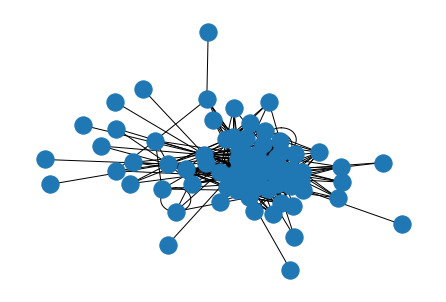

1.9890258772524048
[122, 731, 11.98360655737705, 95, 0.2129822621123825, 1, 1.9890258772524048, 1669.0, 10924, 3641, 0.040983606557377046]


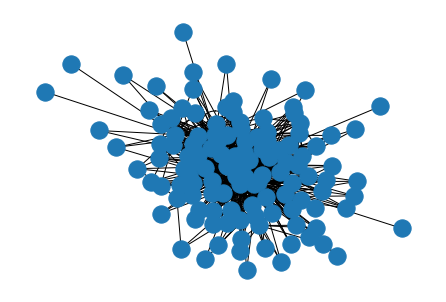

1.9890258772524048
[122, 731, 11.98360655737705, 95, 0.2129822621123825, 1, 1.9890258772524048, 1669.0, 10924, 3641, 0.040983606557377046]


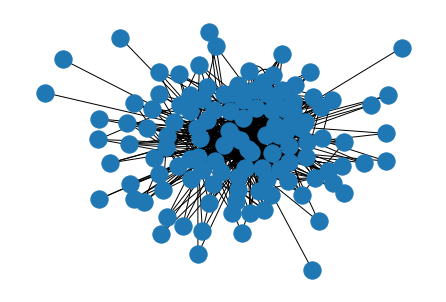

1.9890258772524048
[122, 731, 11.98360655737705, 95, 0.2129822621123825, 1, 1.9890258772524048, 1669.0, 10924, 3641, 0.040983606557377046]


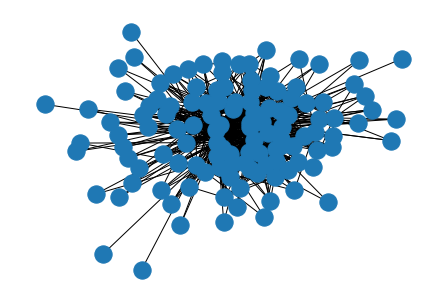

2.2403846153846154
[65, 368, 11.323076923076924, 35, 0.4538436268068331, 1, 2.2403846153846154, 921.0, 5948, 1982, 0.06153846153846154]


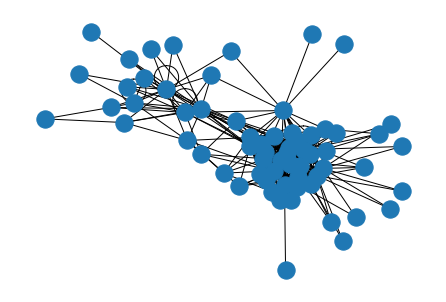

2.2200803212851405
[166, 567, 6.831325301204819, 117, 0.04239922292374939, 1, 2.2200803212851405, 291.0, 2046, 682, 0.21686746987951808]


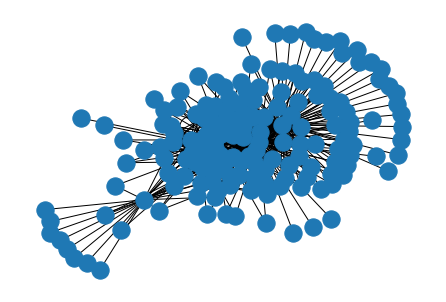

2.2200803212851405
[166, 567, 6.831325301204819, 117, 0.04239922292374939, 1, 2.2200803212851405, 291.0, 2046, 682, 0.21686746987951808]


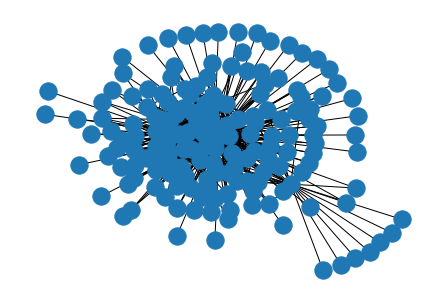

2.0881548495686935
[98, 483, 9.857142857142858, 72, 0.16748815165876776, 1, 2.0881548495686935, 589.0, 3758, 1252, 0.030612244897959183]


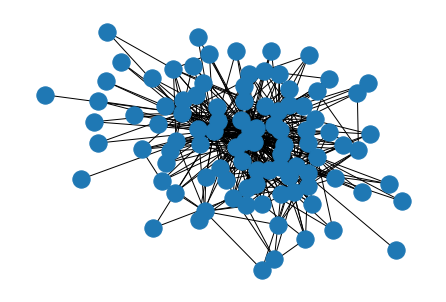

2.0436036036036036
[75, 580, 15.466666666666667, 45, 0.4248386344194727, 1, 2.0436036036036036, 1821.0, 11368, 3789, 0.10666666666666667]


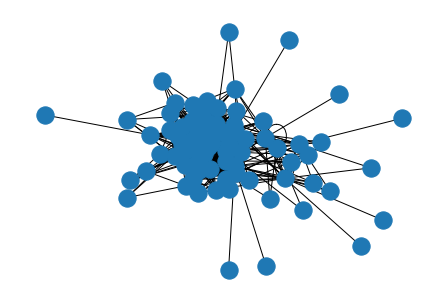

2.0436036036036036
[75, 580, 15.466666666666667, 45, 0.4248386344194727, 1, 2.0436036036036036, 1821.0, 11368, 3789, 0.10666666666666667]


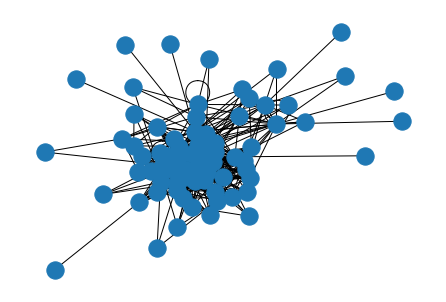

2.0436036036036036
[75, 580, 15.466666666666667, 45, 0.4248386344194727, 1, 2.0436036036036036, 1821.0, 11368, 3789, 0.10666666666666667]


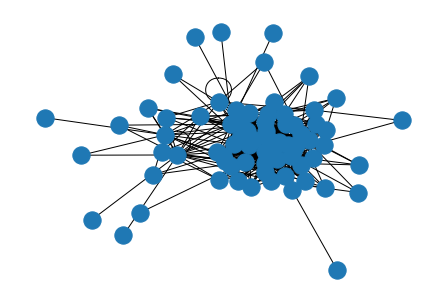

2.0436036036036036
[75, 580, 15.466666666666667, 45, 0.4248386344194727, 1, 2.0436036036036036, 1821.0, 11368, 3789, 0.10666666666666667]


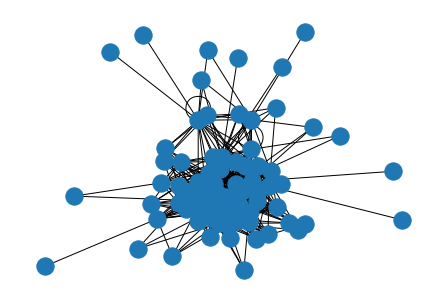

1.9298245614035088
[247, 3261, 26.40485829959514, 197, 0.15128525526597644, 3, 1.9298245614035088, 9040.0, 55850, 18616, 0.0]


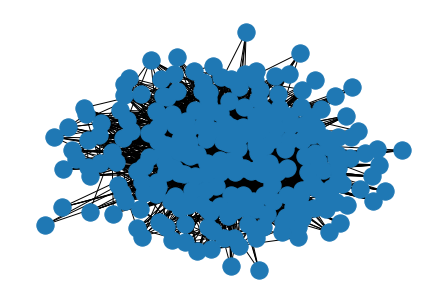

1.6831831831831832
[37, 222, 12.0, 32, 0.4158790170132325, 2, 1.6831831831831832, 440.0, 2842, 947, 0.0]


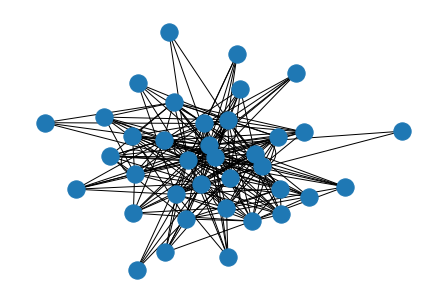

2.2521049222797926
[193, 804, 8.33160621761658, 116, 0.091893039049236, 1, 2.2521049222797926, 866.0, 5754, 1918, 0.11398963730569948]


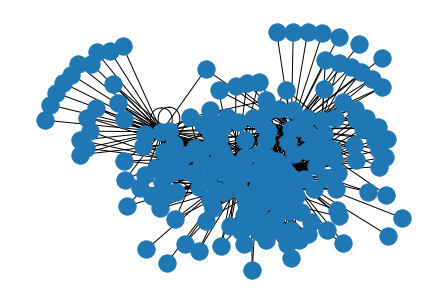

2.0647498831229547
[93, 870, 18.70967741935484, 49, 0.48154981549815495, 1, 2.0647498831229547, 3654.0, 22906, 7635, 0.06451612903225806]


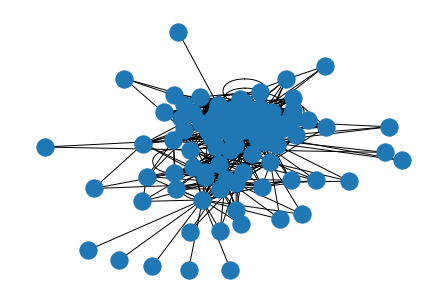

2.009947798680193
[143, 857, 11.986013986013987, 116, 0.17447150120417448, 1, 2.009947798680193, 1956.0, 12474, 4158, 0.06293706293706294]


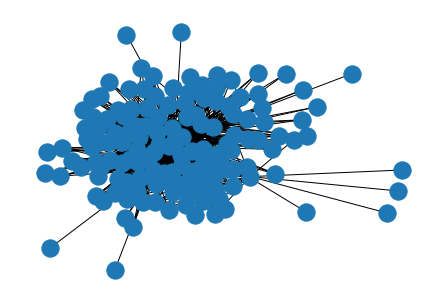

2.235625485625486
[144, 506, 7.027777777777778, 86, 0.09604095563139932, 1, 2.235625485625486, 469.0, 3096, 1032, 0.14583333333333334]


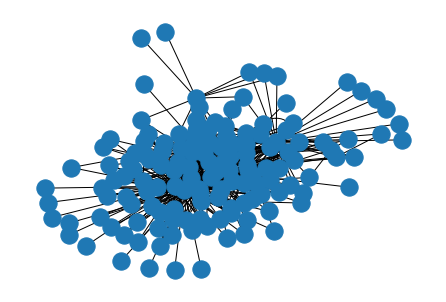

2.235625485625486
[144, 506, 7.027777777777778, 86, 0.09604095563139932, 1, 2.235625485625486, 469.0, 3096, 1032, 0.14583333333333334]


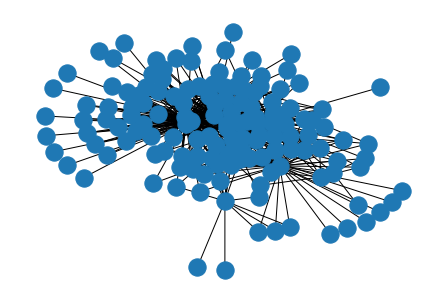

2.235625485625486
[144, 506, 7.027777777777778, 86, 0.09604095563139932, 1, 2.235625485625486, 469.0, 3096, 1032, 0.14583333333333334]


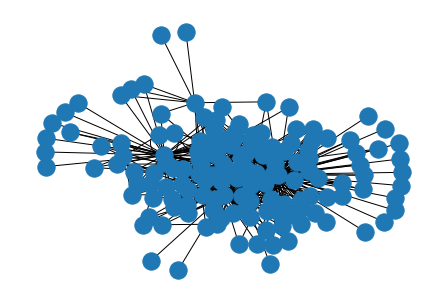

2.1484848484848484
[45, 171, 7.6, 30, 0.3203082003302146, 1, 2.1484848484848484, 194.0, 1350, 450, 0.044444444444444446]


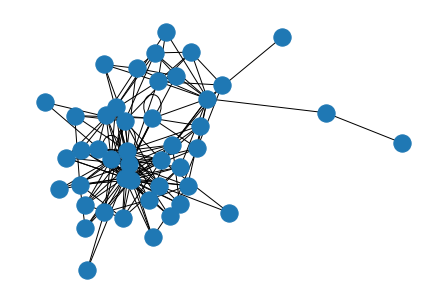

2.1484848484848484
[45, 171, 7.6, 30, 0.3203082003302146, 1, 2.1484848484848484, 194.0, 1350, 450, 0.044444444444444446]


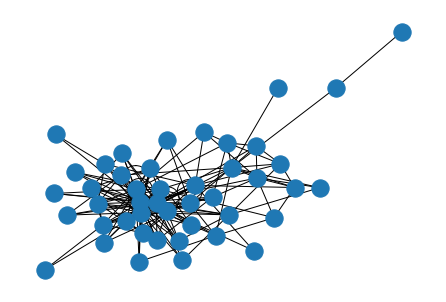

2.1484848484848484
[45, 171, 7.6, 30, 0.3203082003302146, 1, 2.1484848484848484, 194.0, 1350, 450, 0.044444444444444446]


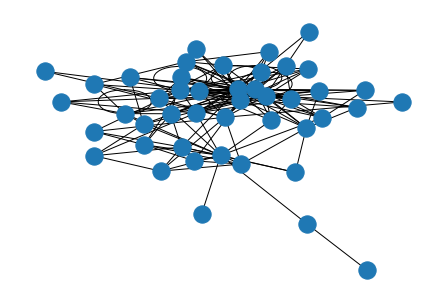

2.1484848484848484
[45, 171, 7.6, 30, 0.3203082003302146, 1, 2.1484848484848484, 194.0, 1350, 450, 0.044444444444444446]


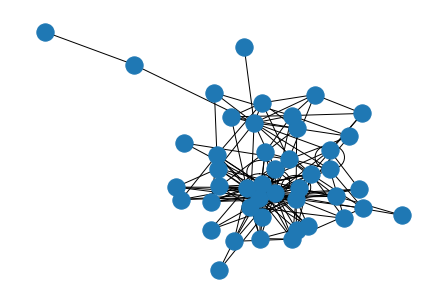

2.1484848484848484
[45, 171, 7.6, 30, 0.3203082003302146, 1, 2.1484848484848484, 194.0, 1350, 450, 0.044444444444444446]


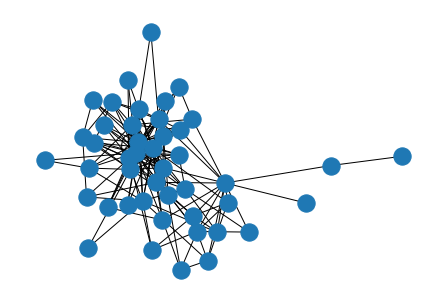

2.1484848484848484
[45, 171, 7.6, 30, 0.3203082003302146, 1, 2.1484848484848484, 194.0, 1350, 450, 0.044444444444444446]


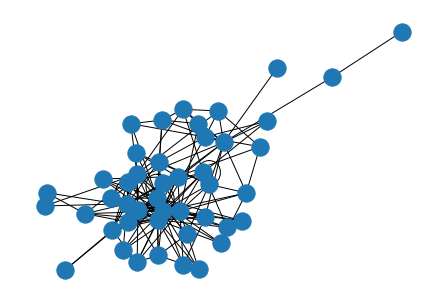

1.9414141414141415
[45, 225, 10.0, 36, 0.3673469387755102, 1, 1.9414141414141415, 348.0, 2396, 798, 0.044444444444444446]


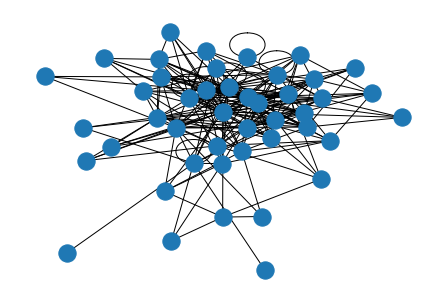

1.9876632801161103
[53, 206, 7.773584905660377, 33, 0.20428462127008415, 2, 1.9876632801161103, 178.0, 1094, 364, 0.0]


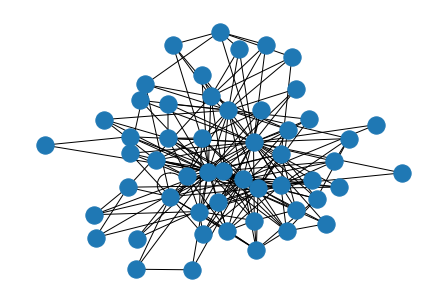

1.9876632801161103
[53, 206, 7.773584905660377, 33, 0.20428462127008415, 2, 1.9876632801161103, 178.0, 1094, 364, 0.0]


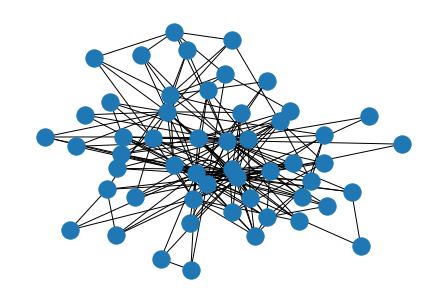

1.9876632801161103
[53, 206, 7.773584905660377, 33, 0.20428462127008415, 2, 1.9876632801161103, 178.0, 1094, 364, 0.0]


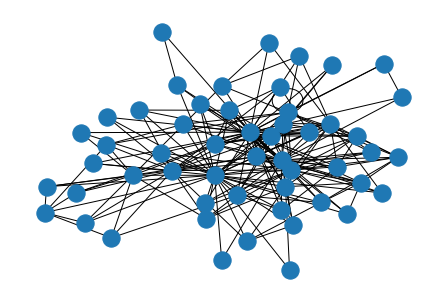

1.9876632801161103
[53, 206, 7.773584905660377, 33, 0.20428462127008415, 2, 1.9876632801161103, 178.0, 1094, 364, 0.0]


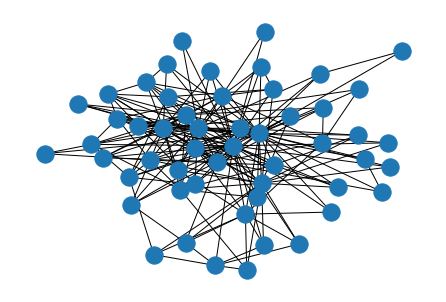

1.9876632801161103
[53, 206, 7.773584905660377, 33, 0.20428462127008415, 2, 1.9876632801161103, 178.0, 1094, 364, 0.0]


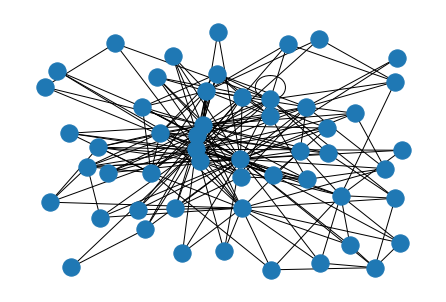

1.9876632801161103
[53, 206, 7.773584905660377, 33, 0.20428462127008415, 2, 1.9876632801161103, 178.0, 1094, 364, 0.0]


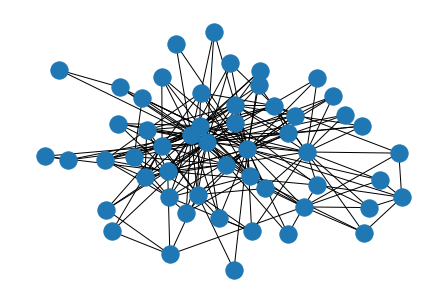

1.9571843251088534
[53, 248, 9.358490566037736, 34, 0.21912114014251782, 1, 1.9571843251088534, 246.0, 1528, 509, 0.018867924528301886]


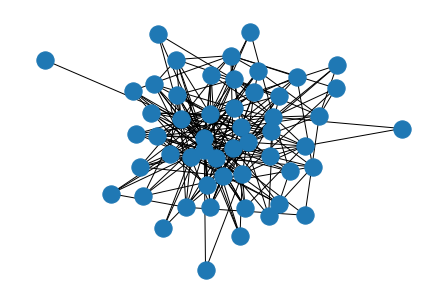

2.109567901234568
[81, 571, 14.098765432098766, 49, 0.4649876690830282, 1, 2.109567901234568, 2074.0, 12964, 4321, 0.1728395061728395]


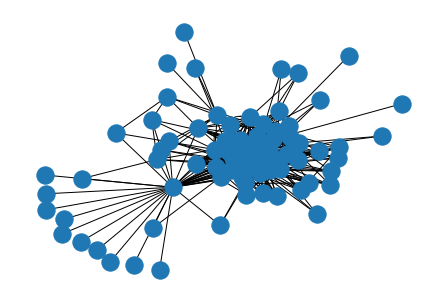

2.109567901234568
[81, 571, 14.098765432098766, 49, 0.4649876690830282, 1, 2.109567901234568, 2074.0, 12964, 4321, 0.1728395061728395]


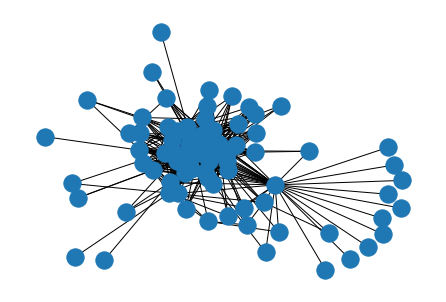

2.109567901234568
[81, 571, 14.098765432098766, 49, 0.4649876690830282, 1, 2.109567901234568, 2074.0, 12964, 4321, 0.1728395061728395]


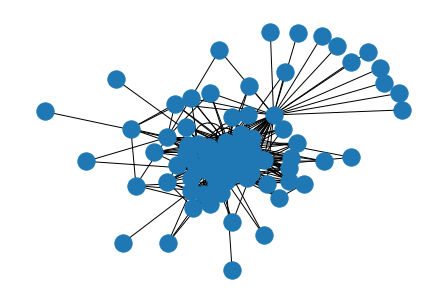

2.1681159420289857
[70, 352, 10.057142857142857, 42, 0.3154772604709689, 1, 2.1681159420289857, 585.0, 3764, 1254, 0.1]


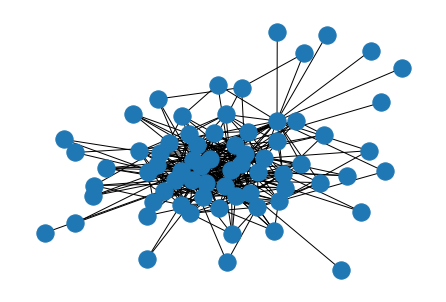

2.1681159420289857
[70, 352, 10.057142857142857, 42, 0.3154772604709689, 1, 2.1681159420289857, 585.0, 3764, 1254, 0.1]


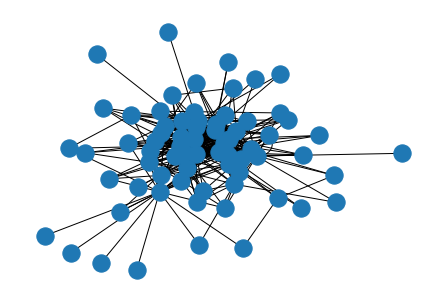

2.1681159420289857
[70, 352, 10.057142857142857, 42, 0.3154772604709689, 1, 2.1681159420289857, 585.0, 3764, 1254, 0.1]


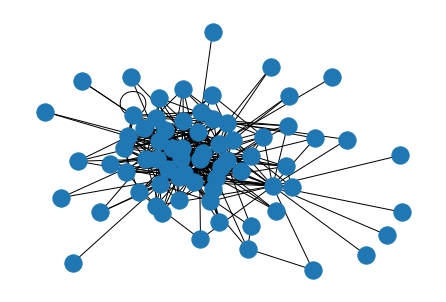

2.1681159420289857
[70, 352, 10.057142857142857, 42, 0.3154772604709689, 1, 2.1681159420289857, 585.0, 3764, 1254, 0.1]


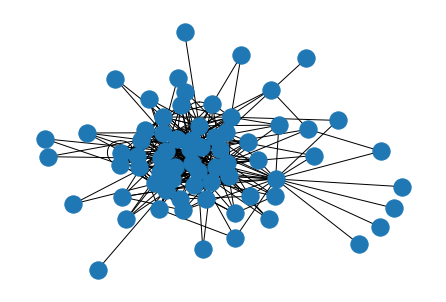

2.1681159420289857
[70, 352, 10.057142857142857, 42, 0.3154772604709689, 1, 2.1681159420289857, 585.0, 3764, 1254, 0.1]


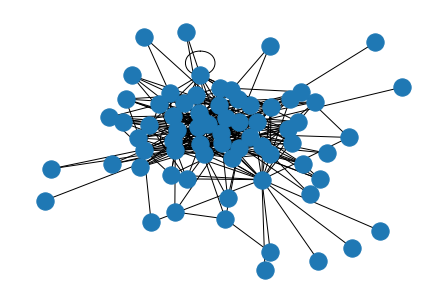

2.108651911468813
[71, 511, 14.394366197183098, 37, 0.4593450028232637, 1, 2.108651911468813, 1627.0, 10244, 3414, 0.1267605633802817]


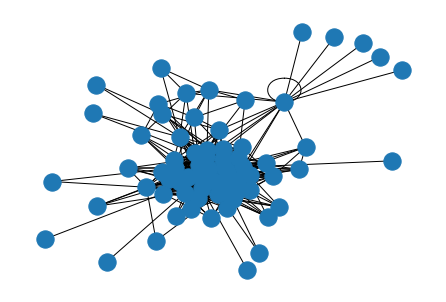

1.9907723855092276
[77, 651, 16.90909090909091, 48, 0.42388727943112986, 1, 1.9907723855092276, 2146.0, 13294, 4431, 0.05194805194805195]


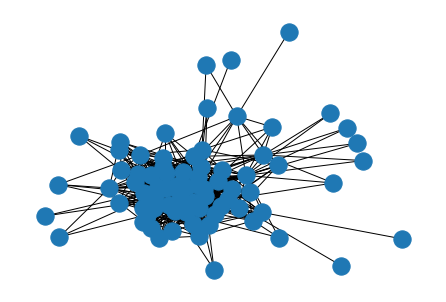

1.9907723855092276
[77, 651, 16.90909090909091, 48, 0.42388727943112986, 1, 1.9907723855092276, 2146.0, 13294, 4431, 0.05194805194805195]


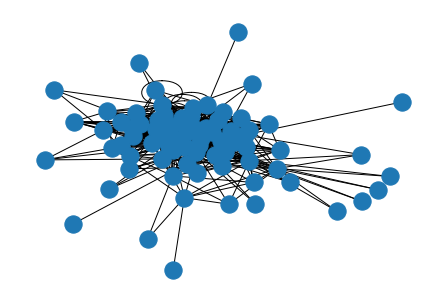

1.9907723855092276
[77, 651, 16.90909090909091, 48, 0.42388727943112986, 1, 1.9907723855092276, 2146.0, 13294, 4431, 0.05194805194805195]


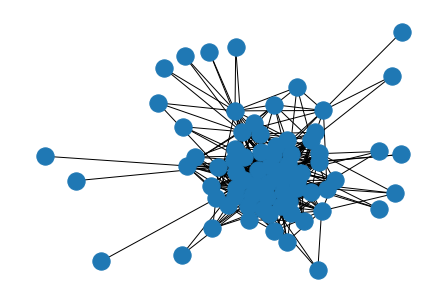

1.9907723855092276
[77, 651, 16.90909090909091, 48, 0.42388727943112986, 1, 1.9907723855092276, 2146.0, 13294, 4431, 0.05194805194805195]


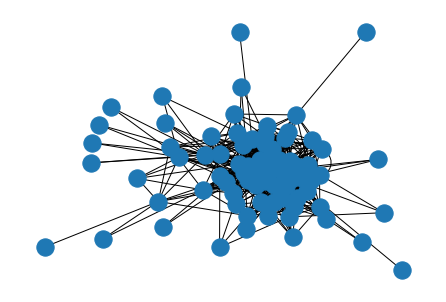

1.7190476190476192
[36, 211, 11.722222222222221, 32, 0.470479704797048, 3, 1.7190476190476192, 510.0, 3412, 1137, 0.0]


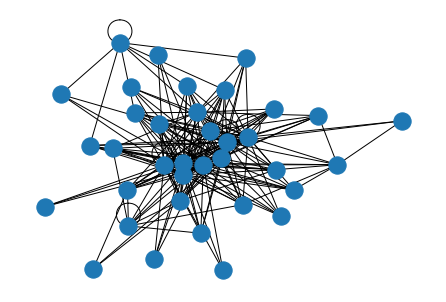

1.7190476190476192
[36, 211, 11.722222222222221, 32, 0.470479704797048, 3, 1.7190476190476192, 510.0, 3412, 1137, 0.0]


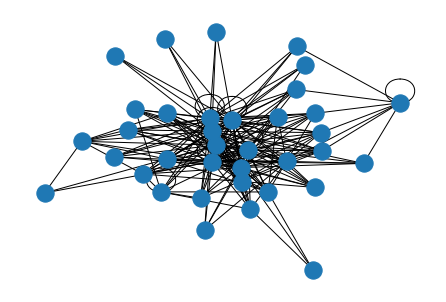

2.1455433455433455
[91, 774, 17.01098901098901, 54, 0.4433135978861868, 1, 2.1455433455433455, 3020.0, 18880, 6293, 0.16483516483516483]


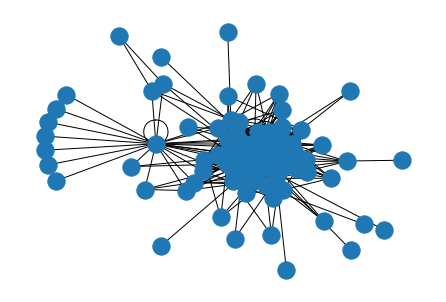

2.1455433455433455
[91, 774, 17.01098901098901, 54, 0.4433135978861868, 1, 2.1455433455433455, 3020.0, 18880, 6293, 0.16483516483516483]


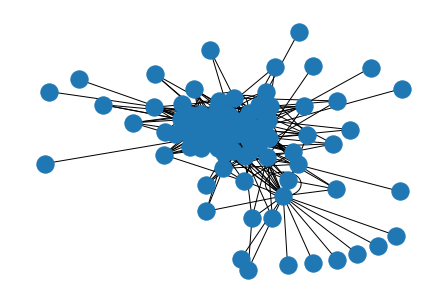

2.1455433455433455
[91, 774, 17.01098901098901, 54, 0.4433135978861868, 1, 2.1455433455433455, 3020.0, 18880, 6293, 0.16483516483516483]


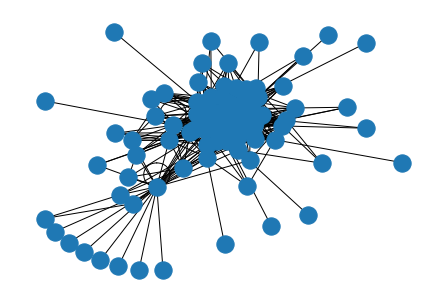

2.1455433455433455
[91, 774, 17.01098901098901, 54, 0.4433135978861868, 1, 2.1455433455433455, 3020.0, 18880, 6293, 0.16483516483516483]


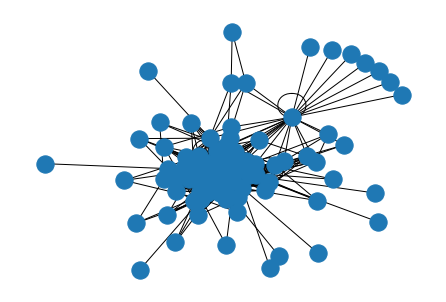

2.1455433455433455
[91, 774, 17.01098901098901, 54, 0.4433135978861868, 1, 2.1455433455433455, 3020.0, 18880, 6293, 0.16483516483516483]


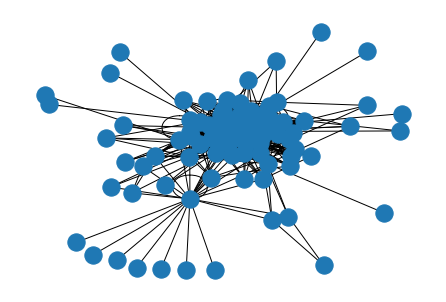

2.1455433455433455
[91, 774, 17.01098901098901, 54, 0.4433135978861868, 1, 2.1455433455433455, 3020.0, 18880, 6293, 0.16483516483516483]


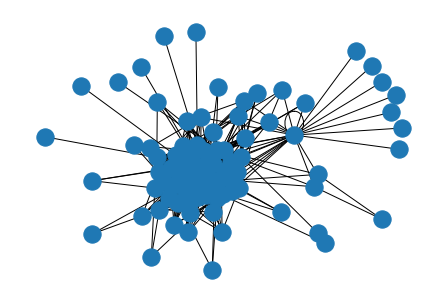

1.951219512195122
[42, 208, 9.904761904761905, 19, 0.3130311614730878, 2, 1.951219512195122, 221.0, 1484, 494, 0.0]


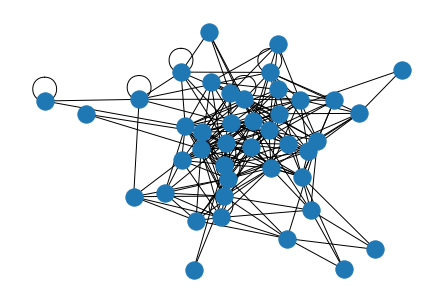

1.554022988505747
[30, 207, 13.8, 28, 0.5289227571873918, 2, 1.554022988505747, 509.0, 3264, 1088, 0.0]


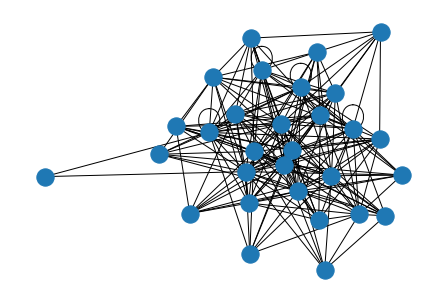

1.554022988505747
[30, 207, 13.8, 28, 0.5289227571873918, 2, 1.554022988505747, 509.0, 3264, 1088, 0.0]


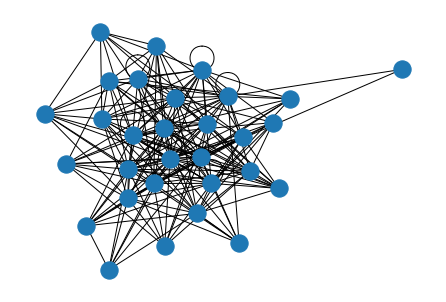

2.1670190274841437
[44, 144, 6.545454545454546, 32, 0.2624254473161034, 1, 2.1670190274841437, 132.0, 834, 278, 0.13636363636363635]


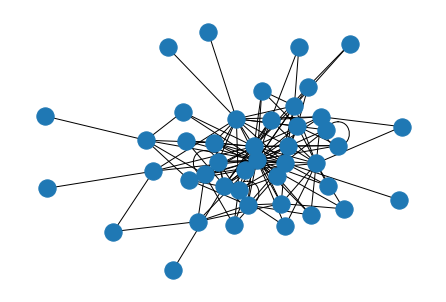

2.1670190274841437
[44, 144, 6.545454545454546, 32, 0.2624254473161034, 1, 2.1670190274841437, 132.0, 834, 278, 0.13636363636363635]


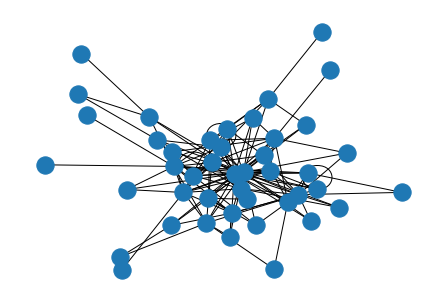

1.8891129032258065
[32, 131, 8.1875, 19, 0.32003469210754554, 1, 1.8891129032258065, 123.0, 872, 290, 0.03125]


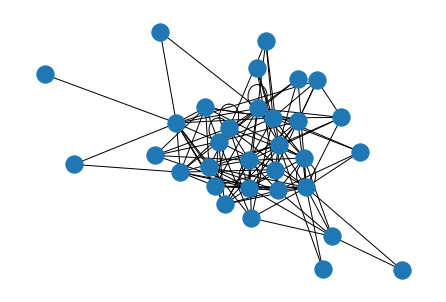

1.6403361344537815
[35, 220, 12.571428571428571, 30, 0.38451895957380133, 3, 1.6403361344537815, 409.0, 2540, 846, 0.0]


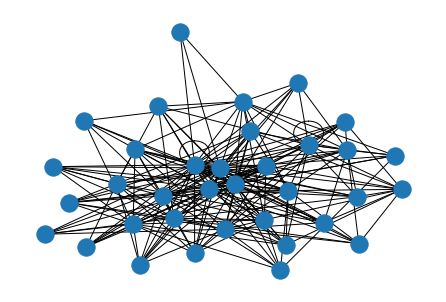

2.10261569416499
[71, 331, 9.32394366197183, 50, 0.199055330634278, 1, 2.10261569416499, 295.0, 1912, 637, 0.04225352112676056]


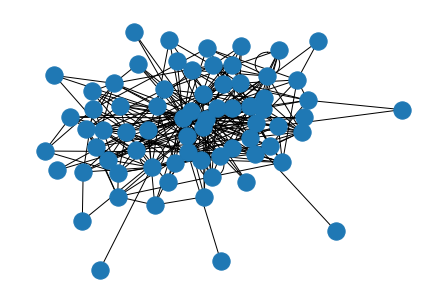

1.6699889258028793
[43, 353, 16.41860465116279, 40, 0.5611833258628418, 1, 1.6699889258028793, 1252.0, 7970, 2656, 0.023255813953488372]


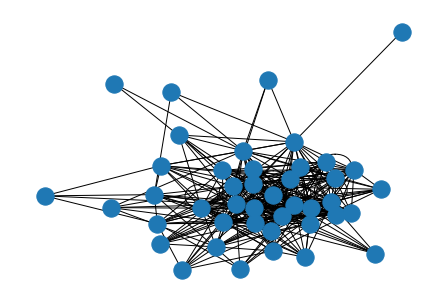

2.081081081081081
[37, 115, 6.216216216216216, 26, 0.26732673267326734, 1, 2.081081081081081, 90.0, 576, 192, 0.10810810810810811]


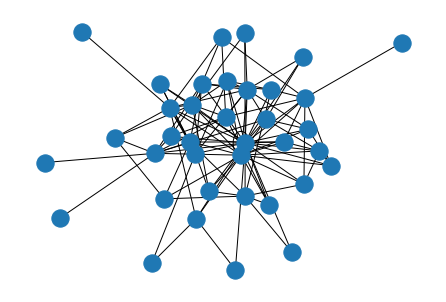

2.081081081081081
[37, 115, 6.216216216216216, 26, 0.26732673267326734, 1, 2.081081081081081, 90.0, 576, 192, 0.10810810810810811]


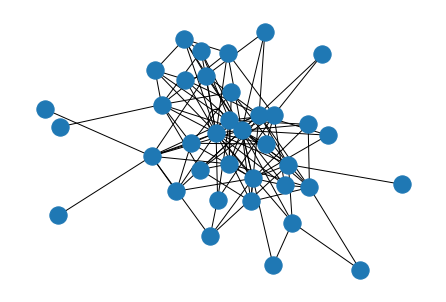

1.8987854251012146
[39, 171, 8.76923076923077, 23, 0.276690888764673, 1, 1.8987854251012146, 165.0, 1110, 370, 0.05128205128205128]


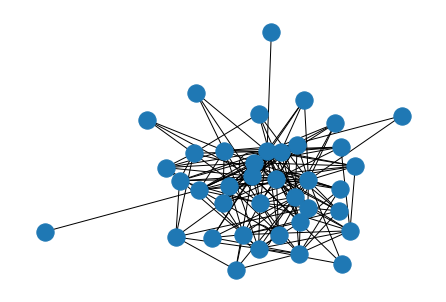

1.8987854251012146
[39, 171, 8.76923076923077, 23, 0.276690888764673, 1, 1.8987854251012146, 165.0, 1110, 370, 0.05128205128205128]


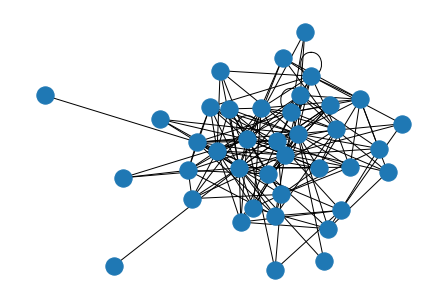

1.509090909090909
[11, 30, 5.454545454545454, 9, 0.4251968503937008, 2, 1.509090909090909, 18.0, 134, 44, 0.0]


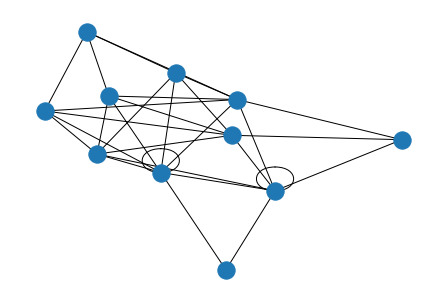

1.756923076923077
[26, 110, 8.461538461538462, 17, 0.436308926780341, 2, 1.756923076923077, 145.0, 936, 312, 0.0]


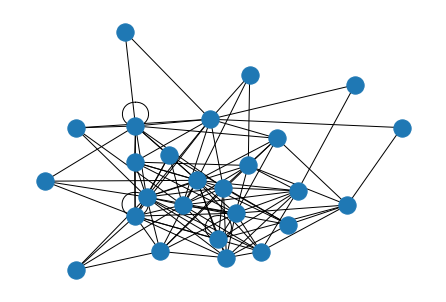

In [69]:
# iterates through networks directory and reads each in as networkx graph G
directory = 'networks'
for filename in os.scandir(directory):
    filename = filename.name
    name, ext = os.path.splitext(filename)
    ext = str(ext)[0:4]
    if ext == '.txt' and filename != 'README':
        G = nx.read_edgelist(directory + '/' + filename)
    network_stats = gather_network_stats(G)
    nx.draw(G)
    plt.show()